In [2]:
import pandas as pd
import time
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker

In [3]:
# file naming variables
today = date.today()
last_version = today - timedelta(days=10)
location = '/Users/Sim/Documents/Other/Programming/Personal Projects/house_price_monitoring'

In [4]:
# Load last week's data
df = pd.read_csv(f'{location}/data/df_{last_version}.csv')
df = df.drop('Unnamed: 0', axis=1)
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True, format = "%d/%m/%Y")
df['CI_upp'] = 1.28*(df['Std dev']/df['Sample Size']**0.5)
df['CI_low'] = -df['CI_upp']

df2= df
df2.head()

,Date,Average Price,Median Price,10th Percentile,90th Percentile,Std dev,Sample Size,CI_upp,CI_low
0,2022-11-06,867789.56,850000.0,524000.0,1250000.0,303834.617,120,35502.309009,-35502.309009
1,2022-11-13,952266.24,875000.0,497500.0,1477500.0,448923.051,120,52455.526745,-52455.526745
2,2022-11-20,871647.03,812500.0,500000.0,1254500.0,327990.409,120,38324.852406,-38324.852406
3,2022-11-27,898337.72,850000.0,532500.0,1335000.0,324512.391,114,38903.513740,-38903.513740
4,2022-12-04,890525.88,820000.0,500000.0,1345000.0,347098.867,112,41981.132911,-41981.132911


In [35]:
#np.shape(np.transpose(np.array(df2[['CI_upp','CI_low']])))
np.amax(np.array(df2[['CI_upp']]))

52455.526744904986

In [7]:
pd.to_datetime(df2.loc[1,'Date'],dayfirst = True, format = "%d/%m")

2022-11-13 00:00:00


In [12]:
def plot(stat = "Median", incl_percentiles = False, incl_CI80 = False, start = "2022-11-06", end = "2024-11-06"):
    df3 = df2[(df2['Date']>=start) & (df2['Date']<=end)]
    fig, ax = plt.subplots()
    
    # plot points  
    ax.plot(df3['Date'].apply(lambda x: x.strftime('%d/%m')),df3[f'{stat} Price'], ".", color = 'b')
    
    # add error bars
    yerr = np.transpose(np.array(df3[['CI_upp']]))
    if incl_CI80 == True: 
        ax.errorbar(df3['Date'].apply(lambda x: x.strftime('%d/%m')),df3[f'{stat} Price'], yerr=yerr, alpha = 0.5)
    
    # plot lines
    ax.plot(df3['Date'].apply(lambda x: x.strftime('%d/%m')),df3[f'{stat} Price'], color = 'b')

    # formatting
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '£{:,}'.format(int(x), ',')))
    ax.yaxis.set_tick_params(which='major', labelcolor='black',labelleft=True)

    plt.ylabel(f'{stat} Price')
    plt.xlabel('Date')
    plt.ylim([min(df3[f'{stat} Price'])- np.amax(yerr), max(df3[f'{stat} Price'])+np.amax(yerr)])


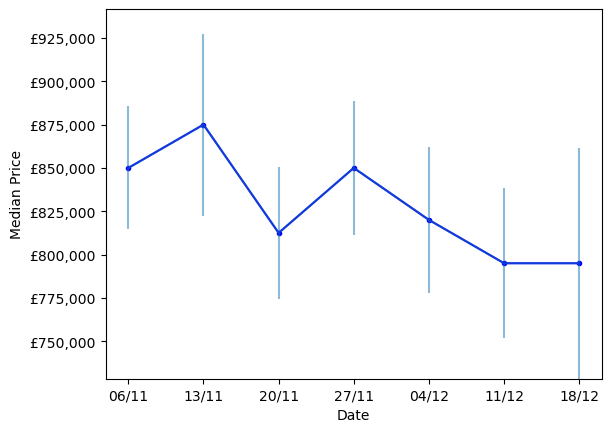

In [18]:
# Testing
plot(stat = "Median", start = '2022-11-01', incl_CI80 = True)

(755000.0, 915000.0)

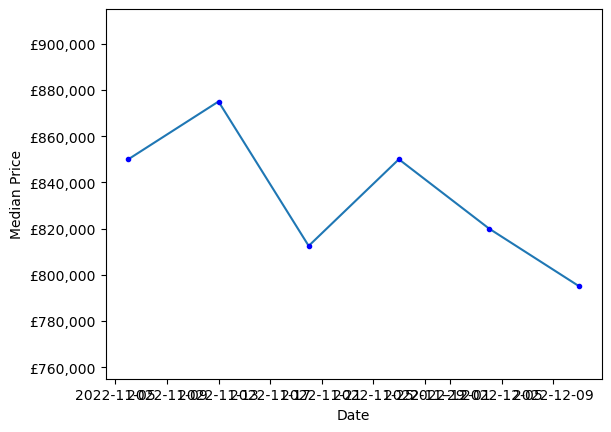

In [15]:
# OLD!!!!
fig, ax = plt.subplots()
ax.plot(df2['Date'],df2['Median Price'])
ax.plot(df2['Date'],df2['Median Price'], ".", color = 'b')

# Use automatic StrMethodFormatter
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '£{:,}'.format(int(x), ',')))
ax.yaxis.set_tick_params(which='major', labelcolor='black',labelleft=True)

plt.ylabel('Median Price')
plt.xlabel('Date')
plt.ylim([min(df2['Median Price'])-40000, max(df2['Median Price'])+40000])

##plt.savefig(f'{location}/charts/{today}_medians_test.png')
#plt.show()